In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar = true will unzip it

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('daisy/*.jpg'))

[PosixPath('datasets/flower_photos/daisy/10994032453_ac7f8d9e2e.jpg'),
 PosixPath('datasets/flower_photos/daisy/6910811638_aa6f17df23.jpg'),
 PosixPath('datasets/flower_photos/daisy/10555815624_dc211569b0.jpg'),
 PosixPath('datasets/flower_photos/daisy/520752848_4b87fb91a4.jpg'),
 PosixPath('datasets/flower_photos/daisy/9529916092_de70623523_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/8127252886_96558c23d1.jpg'),
 PosixPath('datasets/flower_photos/daisy/5577555349_2e8490259b.jpg'),
 PosixPath('datasets/flower_photos/daisy/2567033807_8e918c53d8_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/11439894966_dca877f0cd.jpg'),
 PosixPath('datasets/flower_photos/daisy/14307766919_fac3c37a6b_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/4131565290_0585c4dd5a_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/13491959645_2cd9df44d6_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/6480809771_b1e14c5cc2_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/17027891179_3edc08f4f6.jpg'),
 Po

In [6]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/daisy/10994032453_ac7f8d9e2e.jpg'),
 PosixPath('datasets/flower_photos/daisy/6910811638_aa6f17df23.jpg'),
 PosixPath('datasets/flower_photos/daisy/10555815624_dc211569b0.jpg'),
 PosixPath('datasets/flower_photos/daisy/520752848_4b87fb91a4.jpg'),
 PosixPath('datasets/flower_photos/daisy/9529916092_de70623523_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/8127252886_96558c23d1.jpg'),
 PosixPath('datasets/flower_photos/daisy/5577555349_2e8490259b.jpg'),
 PosixPath('datasets/flower_photos/daisy/2567033807_8e918c53d8_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/11439894966_dca877f0cd.jpg'),
 PosixPath('datasets/flower_photos/daisy/14307766919_fac3c37a6b_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/4131565290_0585c4dd5a_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/13491959645_2cd9df44d6_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/6480809771_b1e14c5cc2_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/17027891179_3edc08f4f6.jpg'),
 Po

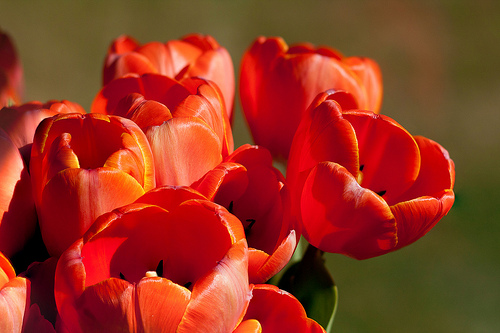

In [7]:
PIL.Image.open(list(data_dir.glob('tulips/*.jpg'))[5])

In [8]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5180896559_b8cfefc21e.jpg'),
 PosixPath('datasets/flower_photos/roses/6036837996_7fbdcdb3c5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/19271410704_932d1f2c97_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6732261031_861a1026fa_n.jpg')]

In [9]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
print(img.shape)
img = cv2.resize(img,(180,180))
print(img.shape)

(240, 320, 3)
(180, 180, 3)


In [10]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}
X, y = [], []
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])
X = np.array(X)
y = np.array(y)
X = X / 255
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
num_classes = 5
model = keras.Sequential([
  keras.layers.Conv2D(16, 3, padding='same', activation='leaky_relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='leaky_relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='leaky_relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='leaky_relu'),
  keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 92s 1s/step - loss: 1.3666 - accuracy: 0.4815
Epoch 2/5
86/86 [==============================] - 88s 1s/step - loss: 0.9864 - accuracy: 0.6057
Epoch 3/5
86/86 [==============================] - 87s 1s/step - loss: 0.8094 - accuracy: 0.6911
Epoch 4/5
86/86 [==============================] - 87s 1s/step - loss: 0.6234 - accuracy: 0.7696
Epoch 5/5
86/86 [==============================] - 90s 1s/step - loss: 0.3936 - accuracy: 0.8601


29/29 [==============================] - 9s 293ms/step


Text(95.72222222222221, 0.5, 'Truth')

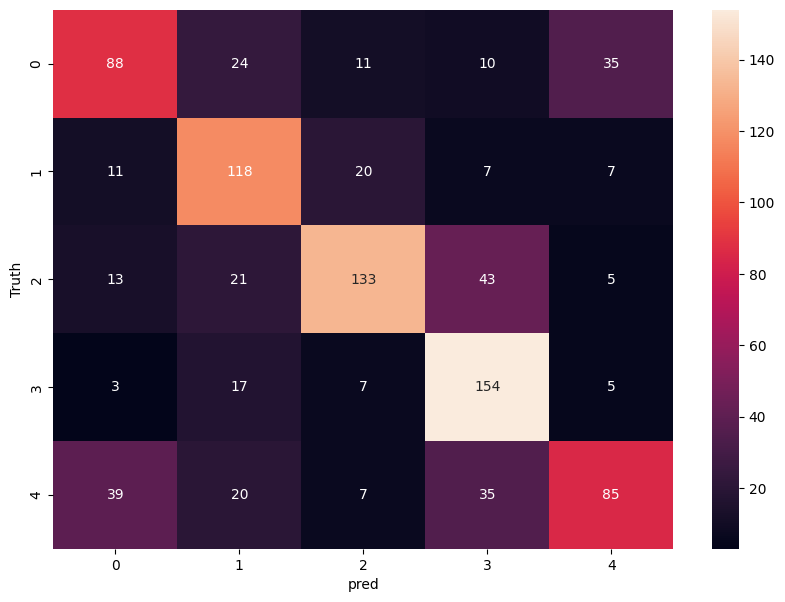

In [12]:
model.evaluate(X_test,y_test)
y_pred = model.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('pred')
plt.ylabel('Truth')

In [13]:
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix

mse = mean_squared_error(y_test, y_pred_labels)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred_labels)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred_labels)
print("R-squared:", r2)

a = accuracy_score(y_test, y_pred_labels)
print("Accuracy Score:", a)

cm= confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix : ")
print(cm)

print("Full report : ")
print(classification_report(y_test, y_pred_labels))

Mean Squared Error: 2.1241830065359477
Mean Absolute Error: 0.7647058823529411
R-squared: -0.10719456898828494
Accuracy Score: 0.6296296296296297
Confusion Matrix : 
[[ 88  24  11  10  35]
 [ 11 118  20   7   7]
 [ 13  21 133  43   5]
 [  3  17   7 154   5]
 [ 39  20   7  35  85]]
Full report : 
              precision    recall  f1-score   support

           0       0.57      0.52      0.55       168
           1       0.59      0.72      0.65       163
           2       0.75      0.62      0.68       215
           3       0.62      0.83      0.71       186
           4       0.62      0.46      0.53       186

    accuracy                           0.63       918
   macro avg       0.63      0.63      0.62       918
weighted avg       0.64      0.63      0.62       918



### Data Augmentation to avoid overfitting

Newly generated training sample using data augmentation

In [6]:
data_augmentation = keras.Sequential([
    # keras.layers.RandomBrightness(0.6),
    # keras.layers.RandomContrast(0.6),
    # keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(1),
    # keras.layers.RandomZoom(height_factor=0.6, width_factor=0.6),
    # keras.layers.RandomTranslation(height_factor=0.6, width_factor=0.6),
    # keras.layers.CenterCrop(height=0.6, width=0.6),
    # keras.layers.RandomCrop(height=0.6, width=0.6),
])

In [7]:
num_classes = 5
model = keras.Sequential([
  data_augmentation,
  keras.layers.Conv2D(16, 3, padding='same', activation='leaky_relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='leaky_relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='leaky_relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='leaky_relu'),
  keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 94s 1s/step - loss: 1.4057 - accuracy: 0.4386
Epoch 2/5
86/86 [==============================] - 91s 1s/step - loss: 1.0371 - accuracy: 0.5825
Epoch 3/5
86/86 [==============================] - 95s 1s/step - loss: 0.9653 - accuracy: 0.6163
Epoch 4/5
86/86 [==============================] - 94s 1s/step - loss: 0.9417 - accuracy: 0.6246
Epoch 5/5
86/86 [==============================] - 91s 1s/step - loss: 0.8655 - accuracy: 0.6595


29/29 [==============================] - 8s 263ms/step


Text(95.72222222222221, 0.5, 'Truth')

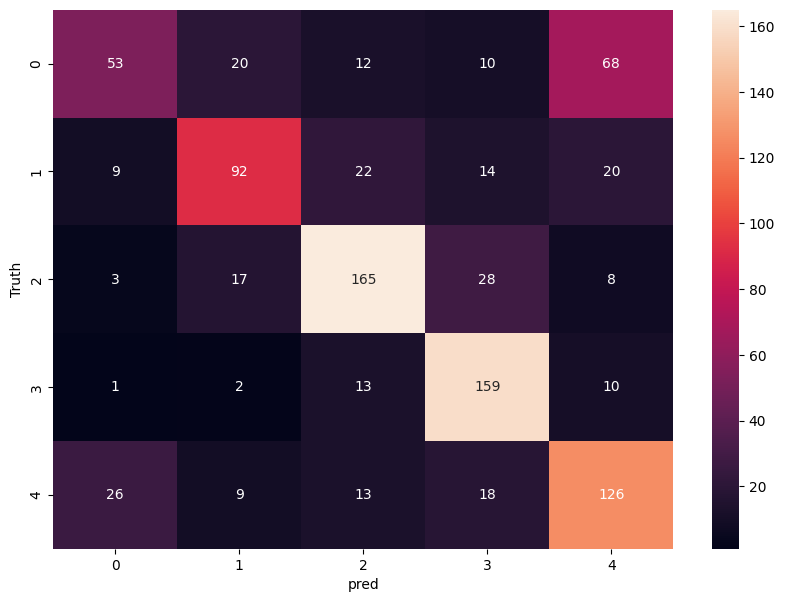

In [8]:
model.evaluate(X_test,y_test)
y_pred = model.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('pred')
plt.ylabel('Truth')

In [9]:
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix

mse = mean_squared_error(y_test, y_pred_labels)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred_labels)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred_labels)
print("R-squared:", r2)

a = accuracy_score(y_test, y_pred_labels)
print("Accuracy Score:", a)

cm= confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix : ")
print(cm)

print("Full report : ")
print(classification_report(y_test, y_pred_labels))

Mean Squared Error: 2.406318082788671
Mean Absolute Error: 0.8028322440087146
R-squared: -0.25944774302536455
Accuracy Score: 0.6481481481481481
Confusion Matrix : 
[[ 53  20  12  10  68]
 [  9  92  22  14  20]
 [  3  17 165  28   8]
 [  1   2  13 159  10]
 [ 26   9  13  18 126]]
Full report : 
              precision    recall  f1-score   support

           0       0.58      0.33      0.42       163
           1       0.66      0.59      0.62       157
           2       0.73      0.75      0.74       221
           3       0.69      0.86      0.77       185
           4       0.54      0.66      0.59       192

    accuracy                           0.65       918
   macro avg       0.64      0.63      0.63       918
weighted avg       0.64      0.65      0.64       918

